In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

## DATAFRAME

In [3]:
df = pd.read_csv("../data/raw/Predict Hair Fall.csv")
df.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [5]:
df.describe()

,Id,Age,Hair Loss
count,999.000000,999.000000,999.000000
mean,153354.673674,34.188188,0.497497
std,25516.041985,9.377980,0.500244
min,110003.000000,18.000000,0.000000
25%,131867.500000,26.000000,0.000000
50%,152951.000000,34.000000,0.000000
75%,174969.000000,42.000000,1.000000
max,199949.000000,50.000000,1.000000


## VISUALIZACIONES

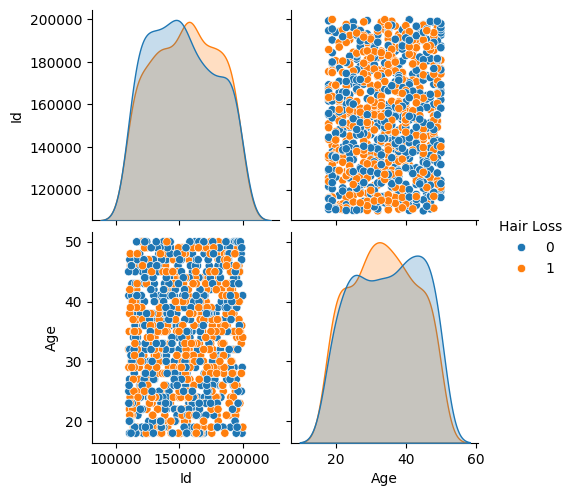

In [6]:
sns.pairplot(df, hue = "Hair Loss")

<Axes: >

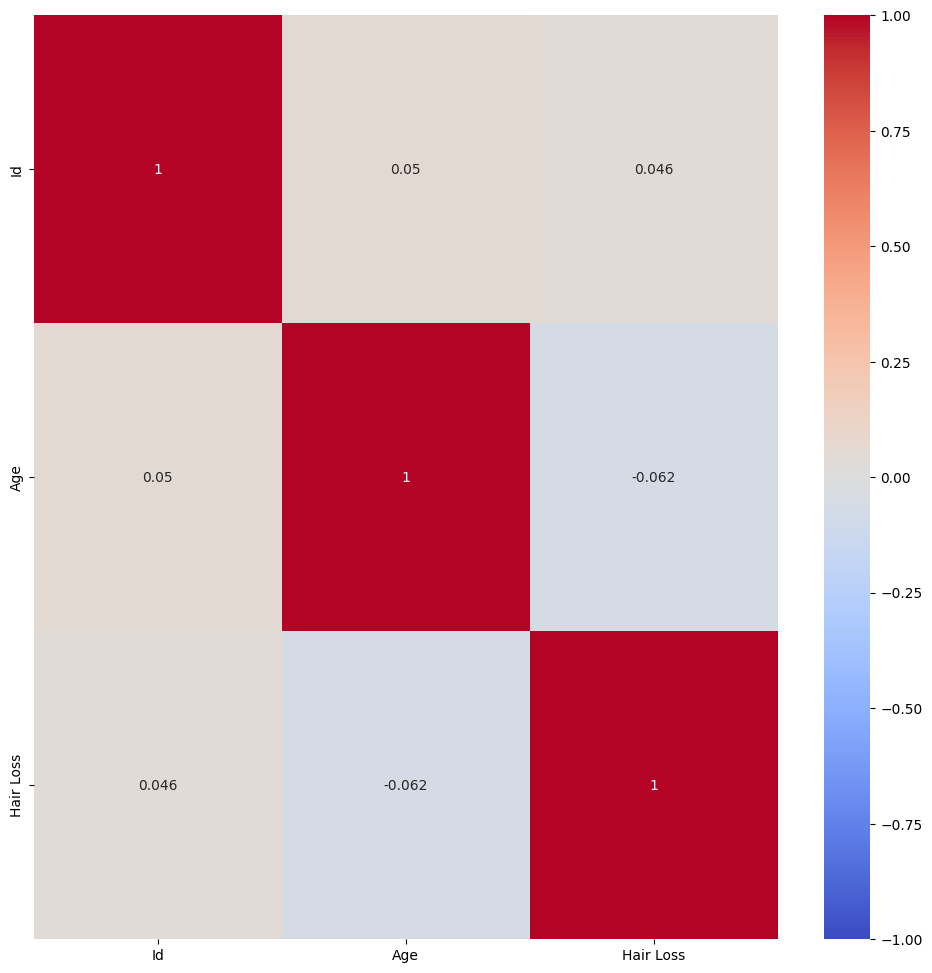

In [7]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(numeric_only= True), annot= True, cmap= "coolwarm", vmin=-1, )

## LIMPIEZA

In [8]:
df_encoded = pd.get_dummies(df, columns=['Genetics', 'Hormonal Changes', 
                                         'Stress', 'Poor Hair Care Habits ',
                                         'Environmental Factors','Smoking', 'Weight Loss '])
df_encoded

,Id,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Age,Hair Loss,Genetics_No,Genetics_Yes,Hormonal Changes_No,Hormonal Changes_Yes,...,Stress_Low,Stress_Moderate,Poor Hair Care Habits _No,Poor Hair Care Habits _Yes,Environmental Factors_No,Environmental Factors_Yes,Smoking_No,Smoking_Yes,Weight Loss _No,Weight Loss _Yes
0,133992,No Data,No Data,Magnesium deficiency,19,0,False,True,True,False,...,False,True,False,True,False,True,True,False,True,False
1,148393,Eczema,Antibiotics,Magnesium deficiency,43,0,True,False,True,False,...,False,False,False,True,False,True,True,False,True,False
2,155074,Dermatosis,Antifungal Cream,Protein deficiency,26,0,True,False,True,False,...,False,True,False,True,False,True,True,False,False,True
3,118261,Ringworm,Antibiotics,Biotin Deficiency,46,0,False,True,False,True,...,False,True,False,True,False,True,True,False,True,False
4,111915,Psoriasis,Accutane,Iron deficiency,30,1,True,False,True,False,...,False,True,True,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,184367,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,33,1,False,True,True,False,...,True,False,False,True,False,True,False,True,False,True
995,164777,No Data,Accutane,Protein deficiency,47,0,False,True,False,True,...,True,False,True,False,True,False,True,False,False,True
996,143273,Androgenetic Alopecia,Antidepressants,Protein deficiency,20,1,True,False,False,True,...,False,True,False,True,True,False,False,True,False,True
997,169123,Dermatitis,Immunomodulators,Biotin Deficiency,32,1,True,False,False,True,...,False,True,False,True,False,True,False,True,False,True


In [9]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Id                          999 non-null    int64 
 1   Medical Conditions          999 non-null    object
 2   Medications & Treatments    999 non-null    object
 3   Nutritional Deficiencies    999 non-null    object
 4   Age                         999 non-null    int64 
 5   Hair Loss                   999 non-null    int64 
 6   Genetics_No                 999 non-null    bool  
 7   Genetics_Yes                999 non-null    bool  
 8   Hormonal Changes_No         999 non-null    bool  
 9   Hormonal Changes_Yes        999 non-null    bool  
 10  Stress_High                 999 non-null    bool  
 11  Stress_Low                  999 non-null    bool  
 12  Stress_Moderate             999 non-null    bool  
 13  Poor Hair Care Habits _No   999 non-null    bool  

## VISUALIZACIONES 2

<Axes: >

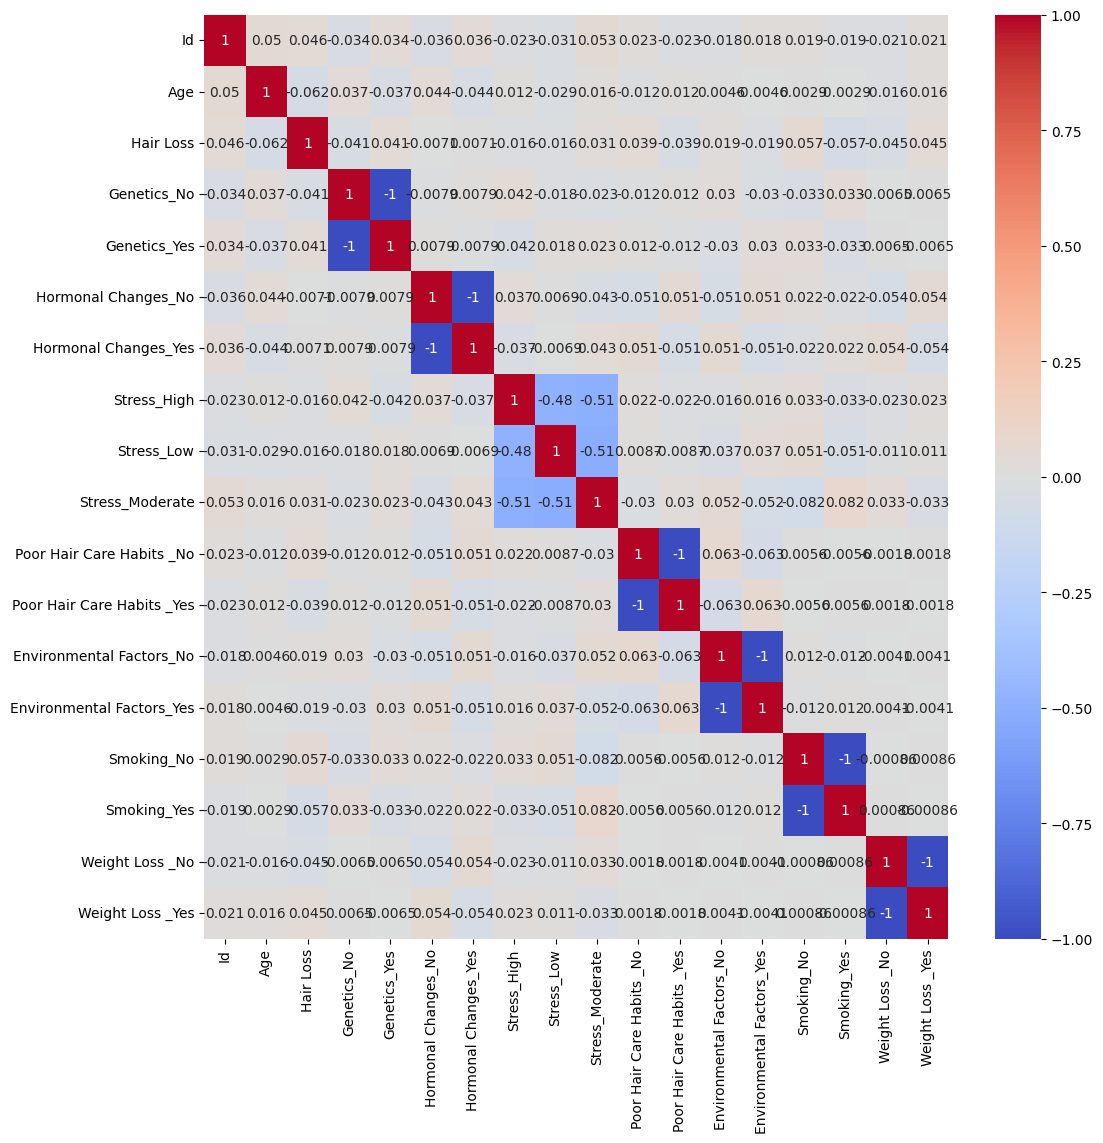

In [10]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_encoded.corr(numeric_only= True), annot= True, cmap= "coolwarm", vmin=-1, )

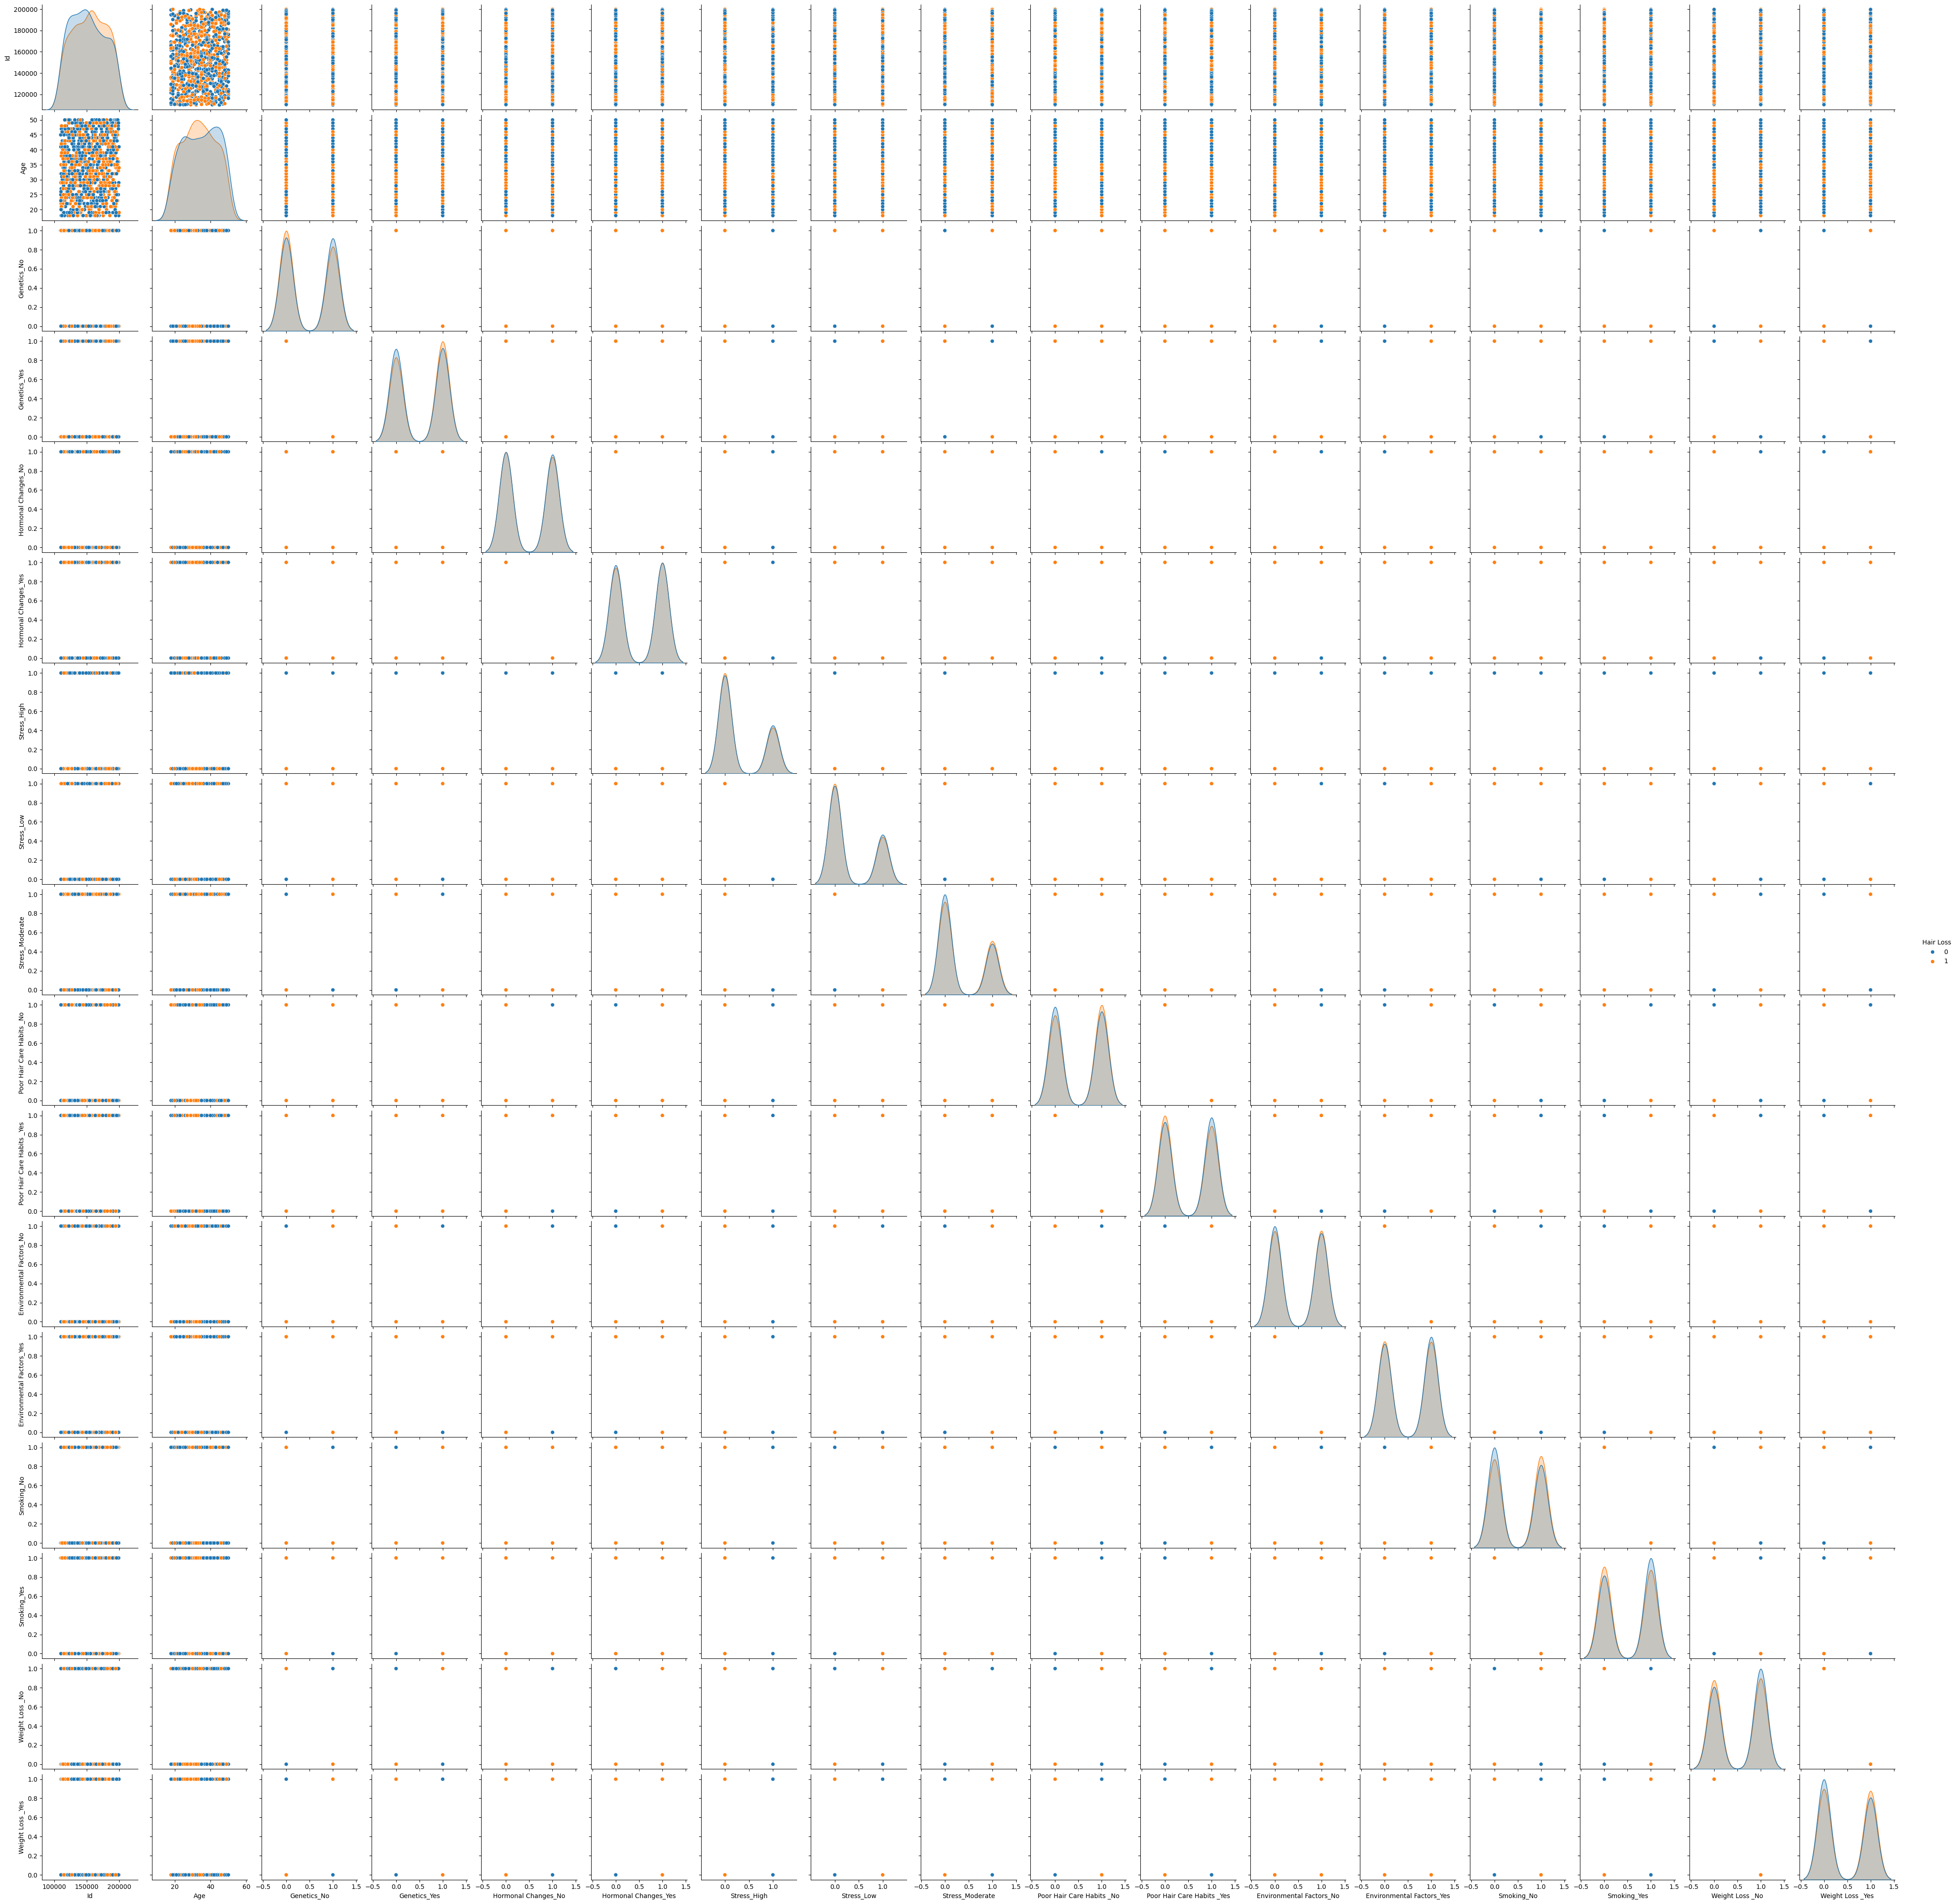

In [11]:
sns.pairplot(df_encoded, hue = "Hair Loss")

## MODELO 1: LOGISTIC REGRESSION

In [12]:
X = df_encoded[["Age","Genetics_No", "Genetics_Yes", 
        "Hormonal Changes_No", "Hormonal Changes_Yes","Stress_High","Stress_Low", "Stress_Moderate", "Poor Hair Care Habits _No", "Poor Hair Care Habits _Yes", "Environmental Factors_No",
        "Environmental Factors_Yes", "Smoking_No", "Smoking_Yes", "Weight Loss _No" , "Weight Loss _Yes"]]
y = df_encoded["Hair Loss"]

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [14]:
predictions = model.predict(X)
print(predictions)

[1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1
 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1
 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0
 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1
 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1
 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0
 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1
 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1
 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1
 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0
 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1
 1 0 1 1 1 0 0 0 1 0 1 1 

In [15]:
predicions_proba = model.predict_proba(X)
print(np.round(np.array(predicions_proba), 2))

[[0.43 0.57]
 [0.58 0.42]
 [0.44 0.56]
 ...
 [0.46 0.54]
 [0.52 0.48]
 [0.48 0.52]]


In [16]:
model.score(X, y)

0.5445445445445446

## MODELO 2: KNN

NORMALIZAR TB LOS 2 DATOS QUE ME FALTAN

array([[<Axes: title={'center': 'Id'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Hair Loss'}>, <Axes: >]], dtype=object)

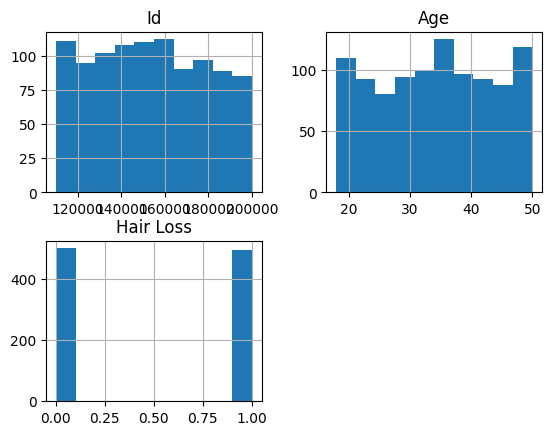

In [17]:
df.hist()

array([[<Axes: title={'center': 'Id'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Hair Loss'}>, <Axes: >]], dtype=object)

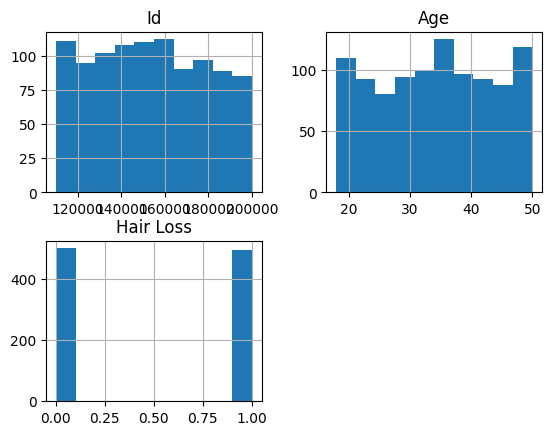

In [18]:
df.hist()